In [1]:
import os
import sys
sys.path.append('../')

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import src.io as sio
import src.preprocessing as spp
import src.fitting as sft
import ipympl

In [2]:
SPECTROMETER_FOLDER = "20210624_TipOpticalAlignment_FR03-2R3\\SpectrometerData_FR03-2R3\\"
SPECTROMETER_FOLDERPATH = sio.get_qudiamond_folderpath(SPECTROMETER_FOLDER)

In [3]:
for file in os.listdir(SPECTROMETER_FOLDERPATH):
    if file.endswith(".txt"):
        filename = file.split(".")[0]
        print(filename)
        #data = sio.read_spectrometer_data(filename, folder=SPECTROMETER_FOLDERPATH)
        #fig, ax = plt.subplots()
        #ax.plot(data.wavelength, data.intensity)
        #ax.set_title(filename)

50mW_Subt20_15-47-44-988
60mW_Subt20_15-48-20-988
70mW_Subt20_15-49-26-988
80mW_650LP_800SP_Subt20_15-53-56-988
80mW_background_Subt20_15-55-26-988
80mW_center_Subt20_15-56-20-988
80mW_center_Subt20_15-59-28-988
80mW_lower_right_Subt20_15-55-56-988
80mW_Subt20_15-52-08-988
FR03-2R3_50mW_background_QEP037201_15-36-03-989
FR03-2R3_50mW_lower_right_QEP037201_15-35-03-989
FR03-2R3_50mW_potential_nv_QEP037201_15-59-28-987


In [4]:
data_files = {
        "Background": "80mW_background_Subt20_15-55-26-988",
        "Center bright spot": "80mW_center_Subt20_15-56-20-988",
        "Lower right bright spot":"80mW_lower_right_Subt20_15-55-56-988",
        "NV": "80mW_Subt20_15-52-08-988"
}

src.io :: INFO :: Saving '80mW_background_Subt20_15-55-26-988' to 'C:/Nextcloud\qudiamond-figures\20210624_TipOpticalAlignment_FR03-2R3\SpectrometerData_FR03-2R3\'
src.io :: INFO :: Saving '80mW_center_Subt20_15-56-20-988' to 'C:/Nextcloud\qudiamond-figures\20210624_TipOpticalAlignment_FR03-2R3\SpectrometerData_FR03-2R3\'
src.io :: INFO :: Saving '80mW_lower_right_Subt20_15-55-56-988' to 'C:/Nextcloud\qudiamond-figures\20210624_TipOpticalAlignment_FR03-2R3\SpectrometerData_FR03-2R3\'
src.io :: INFO :: Saving '80mW_Subt20_15-52-08-988' to 'C:/Nextcloud\qudiamond-figures\20210624_TipOpticalAlignment_FR03-2R3\SpectrometerData_FR03-2R3\'


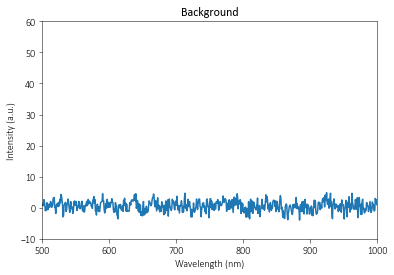

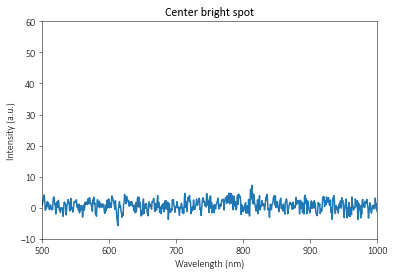

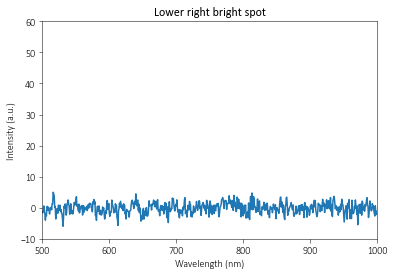

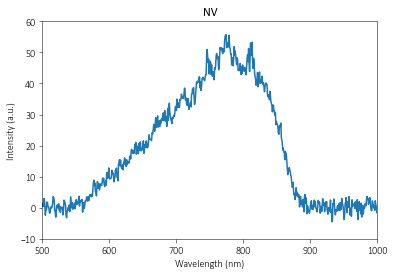

In [5]:
%matplotlib inline
for key, filename in data_files.items():
    data = sio.read_spectrometer_data(filename, folder=SPECTROMETER_FOLDERPATH)
    fig, ax = plt.subplots()
    ax.set_xlim([500, 1000])
    ax.set_ylim([-10, 60])
    ax.plot(data.wavelength, data.intensity)
    ax.set_title(key)
    ax.set_xlabel("Wavelength (nm)")
    ax.set_ylabel("Intensity (a.u.)")
    sio.save_figures(filename, folder=SPECTROMETER_FOLDER)

src.io :: INFO :: Saving 'composite_figure' to 'C:/Nextcloud\qudiamond-figures\20210624_TipOpticalAlignment_FR03-2R3\SpectrometerData_FR03-2R3\'


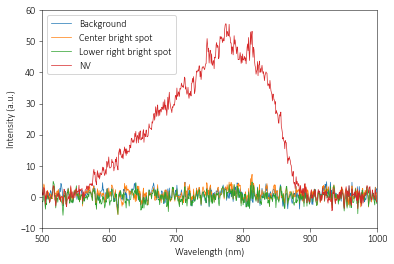

In [6]:
%matplotlib inline

fig, ax = plt.subplots()

for key, filename in data_files.items():
    data = sio.read_spectrometer_data(filename, folder=SPECTROMETER_FOLDERPATH)
    ax.plot(data.wavelength, data.intensity, label=key, linewidth=0.7)

ax.set_xlim([500, 1000])
ax.set_ylim([-10, 60])
ax.set_xlabel("Wavelength (nm)")
ax.set_ylabel("Intensity (a.u.)")
ax.legend()
sio.save_figures("composite_figure", folder=SPECTROMETER_FOLDER)